In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns

In [3]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [4]:
measurements = pd.read_sql("SELECT* from measurements", get_db_url('iris_db'))

In [5]:
species = pd.read_sql("SELECT* from species", get_db_url('iris_db'))

In [6]:
# Use the iris database to answer the following quesitons:



In [7]:
measurements = pd.merge(measurements, species, left_on='species_id', right_on='species_id', how='left')

In [8]:
measurements.head(5)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa


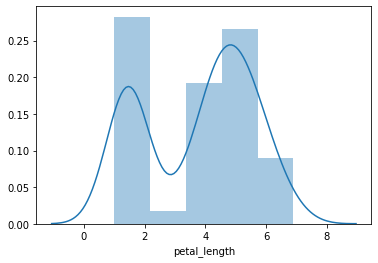

In [9]:
# What does the distribution of petal lengths look like?

sns.distplot(measurements.petal_length)

# Looks like bimodal distribution

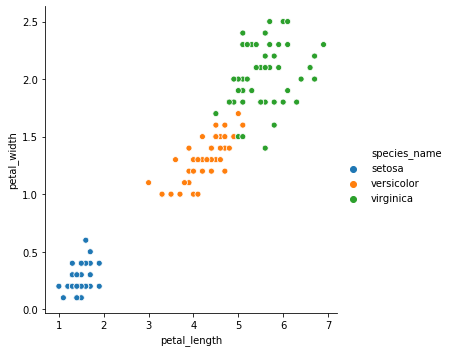

In [10]:
# Is there a correlation between petal length and petal width?

sns.relplot(x='petal_length', y='petal_width', hue = 'species_name', data=measurements)

In [26]:
measurements['petal_ratio'] = measurements.petal_length/measurements.petal_width
measurements['sepal_ratio'] = measurements.sepal_length/measurements.sepal_width
measurements.head(5)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name,petal_ratio,sepal_ratio
0,1,5.1,3.5,1.4,0.2,1,setosa,7.0,1.457143
1,2,4.9,3.0,1.4,0.2,1,setosa,7.0,1.633333
2,3,4.7,3.2,1.3,0.2,1,setosa,6.5,1.468750
3,4,4.6,3.1,1.5,0.2,1,setosa,7.5,1.483871
4,5,5.0,3.6,1.4,0.2,1,setosa,7.0,1.388889


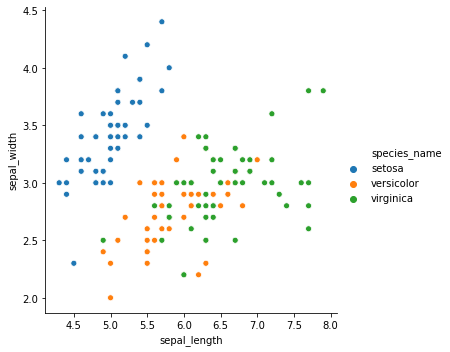

In [11]:
# Would it be reasonable to predict species based on sepal width and sepal length?

sns.relplot(x='sepal_length', y='sepal_width', hue = 'species_name', data=measurements)

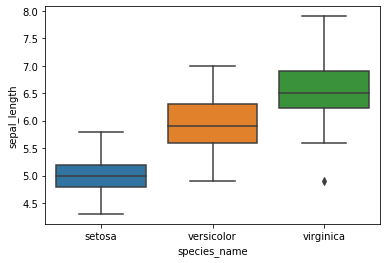

In [28]:
sns.boxplot(y='sepal_length', x='species_name', data=measurements)


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


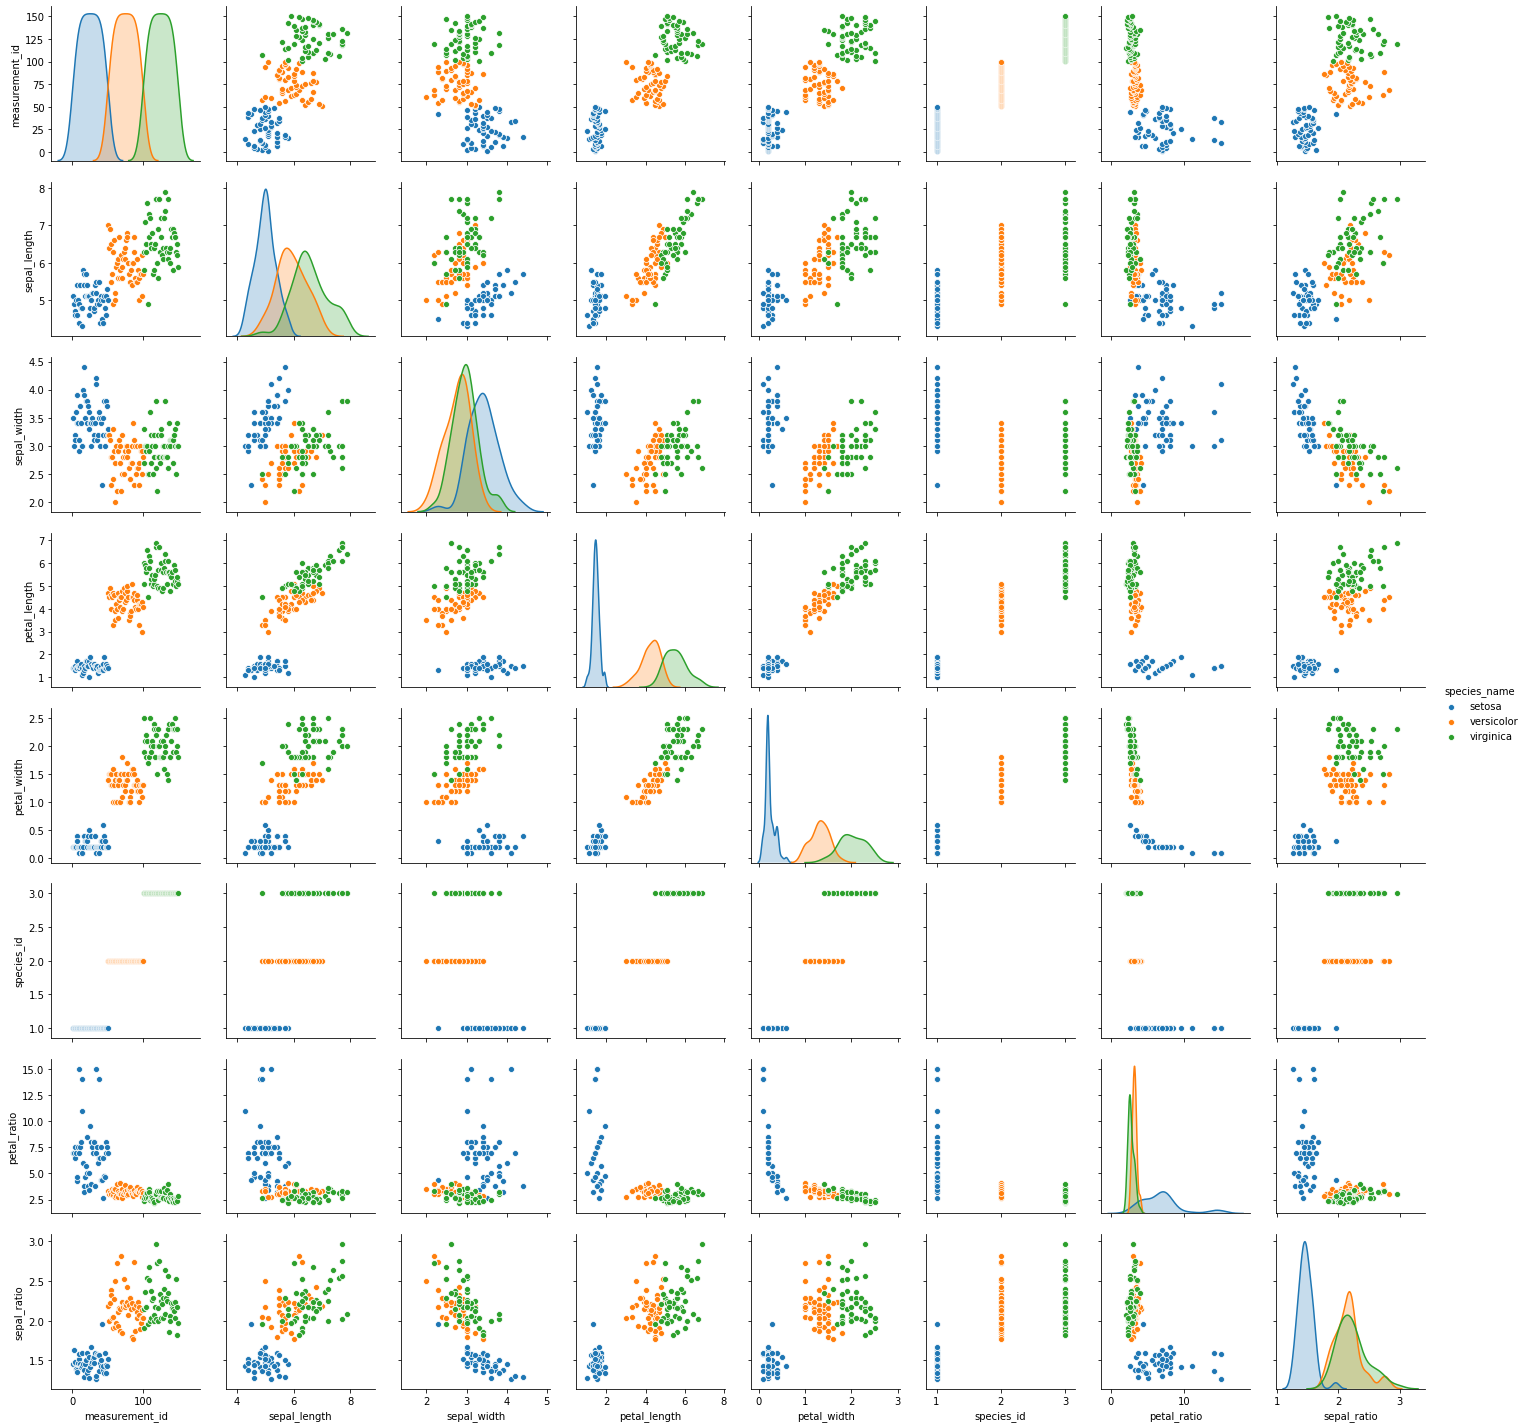

In [31]:
# Which features would be best used to predict species?
#petal length and petal width
sns.pairplot(data=measurements, hue='species_name')


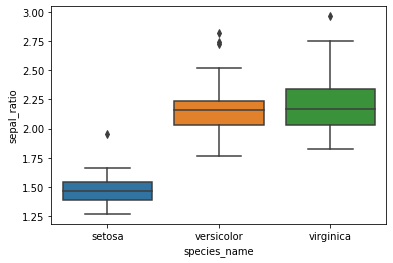

In [30]:
sns.boxplot(y='sepal_ratio', x='species_name', data=measurements)

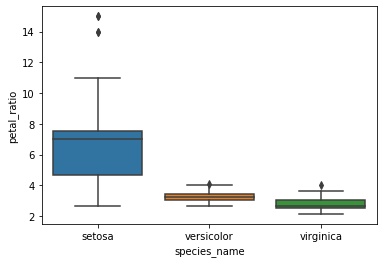

In [29]:
sns.boxplot(y='petal_ratio', x='species_name', data=measurements)

#petal length and width and sepal ratio is good identifier of Setosa species. 

In [12]:
# Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.
# What do you notice?


anscombe = sns.load_dataset('anscombe')
anscombe.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [13]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

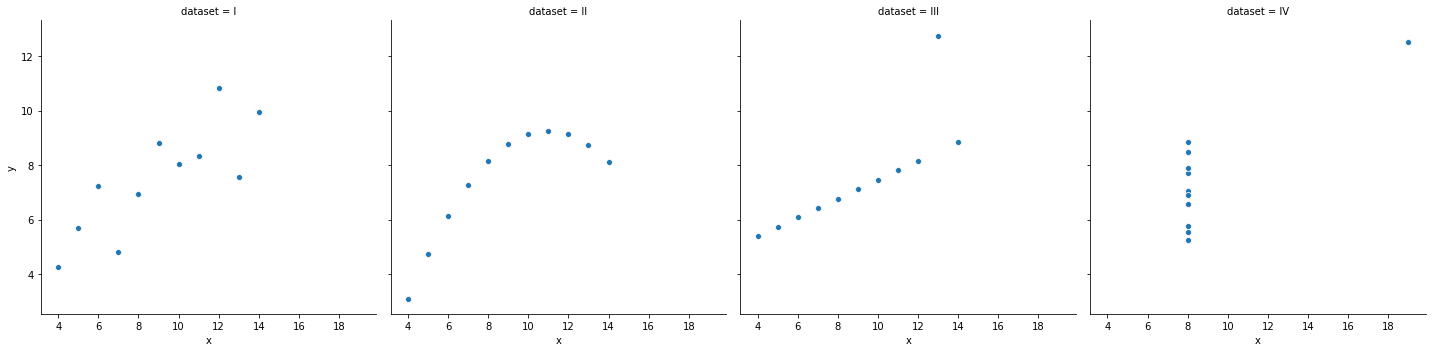

In [14]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column

sns.relplot(data = anscombe, x = 'x', y ='y', col = 'dataset')

Different distributions can have same mean, std etc. 


In [39]:
# Load the InsectSprays dataset and read it's documentation. 
# Create a boxplot that shows the effectiveness of the different insect sprays

InsectSprays = data('InsectSprays')
InsectSprays

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


Text(0.5, 1.0, 'Effectiveness of the different insect sprays')

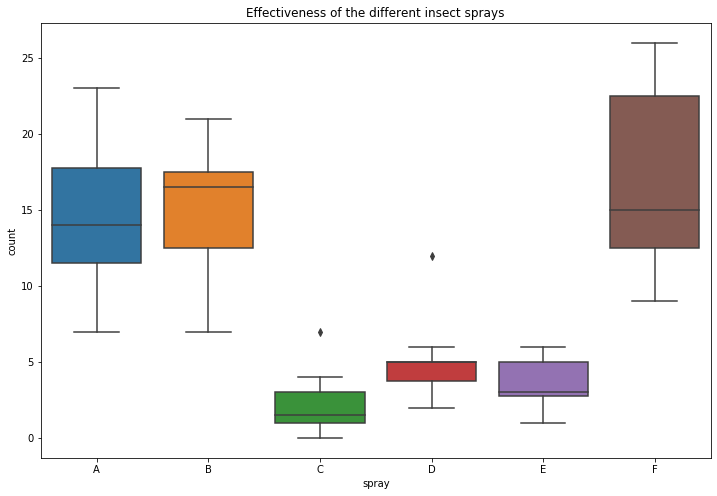

In [40]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=InsectSprays, y='count', x= 'spray')
plt.title('Effectiveness of the different insect sprays')

In [17]:
# Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

# Does whether or not a province is Catholic influence fertility?
# What measure correlates most strongly with fertility?


In [42]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [43]:
swiss.head(5)



,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [46]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)

swiss['is_catholic'] = swiss.Catholic > 60.0
type(swiss.Catholic.iloc[0])

numpy.float64

Text(0.5, 1.0, 'E')

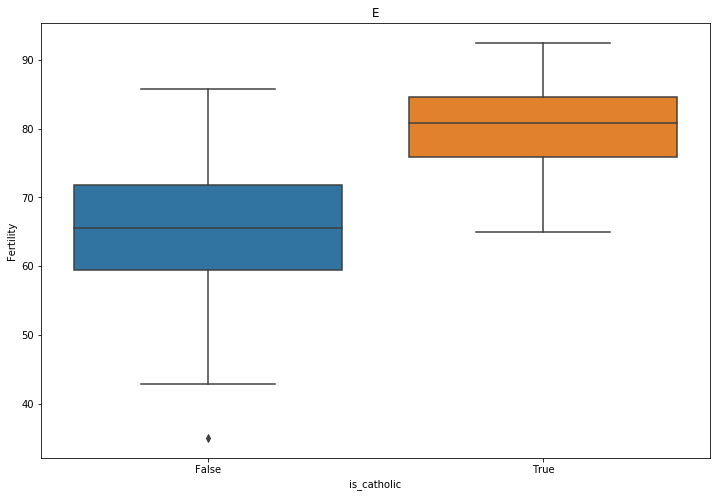

In [47]:
# Does whether or not a province is Catholic influence fertility?

plt.figure(figsize=(12, 8))

sns.boxplot(data=swiss, y='Fertility', x= 'is_catholic')
plt.title('E')

<Figure size 864x720 with 0 Axes>

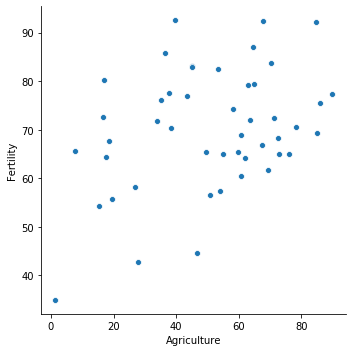

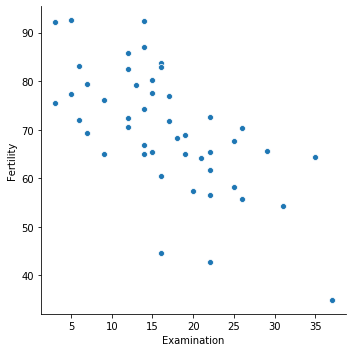

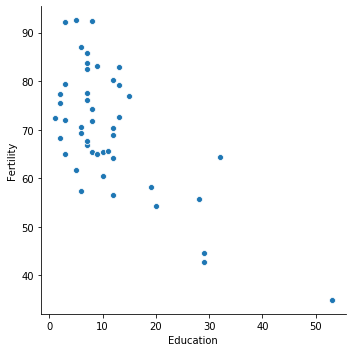

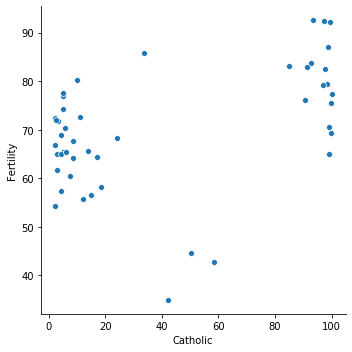

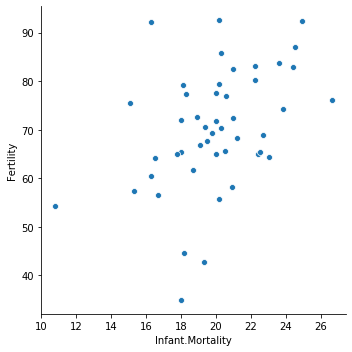

In [51]:
plt.figure(figsize=(12, 10))

sns.relplot(data = swiss, y = 'Fertility', x = 'Agriculture')

sns.relplot(data = swiss, y = 'Fertility', x = 'Examination')

sns.relplot(data = swiss, y = 'Fertility', x = 'Education')

sns.relplot(data = swiss, y = 'Fertility', x = 'Catholic')

sns.relplot(data = swiss, y = 'Fertility', x = 'Infant.Mortality')

In [49]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.605023
Name: Fertility, dtype: float64

In [11]:
# Using the chipotle dataset from the previous exercise,
# create a bar chart that shows the 4 most popular items and the revenue produced by each.
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url
orders = pd.read_sql("SELECT* from orders", get_db_url('chipotle'))


In [15]:
orders.head(5)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [16]:
#create a new column names 'price' with prices as a float
orders['price'] = orders.item_price.str.replace('$', '').astype(float)

In [17]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98


In [18]:
#groupby item_name and find total quantity for 4 largest
highest = orders.groupby('item_name').quantity.sum().nlargest(4)
highest

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [19]:
highest.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [20]:
# revenue produced by 5 highest selling items.
revenue = orders[orders.item_name.isin(highest.index)].groupby('item_name').price.sum()
revenue = revenue.reset_index()
revenue

,item_name,price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


Text(0, 0.5, 'Revenue\n')

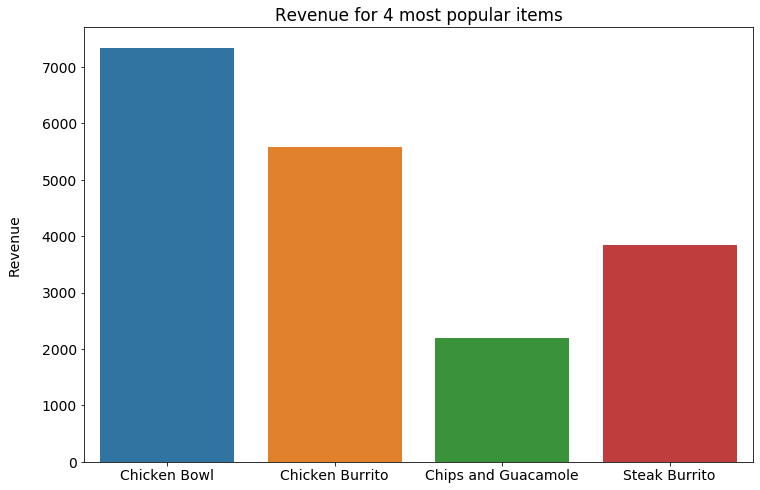

In [21]:
plt.rc('font', size=14)
plt.figure(figsize=(12, 8))
sns.barplot(data=revenue, y='price', x='item_name')
plt.title('Revenue for 4 most popular items')
plt.xlabel('')
plt.ylabel('Revenue\n')



In [3]:
# Load the sleepstudy data and read it's documentation.
# Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line 
# showing the average change in reaction time.

sleepstudy = data('sleepstudy')
sleepstudy.Subject = 'A' + sleepstudy.Subject.astype(str)
sleepstudy.head(4)

,Reaction,Days,Subject
1,249.5600,0,A308
2,258.7047,1,A308
3,250.8006,2,A308
4,321.4398,3,A308


In [4]:
average = sleepstudy.groupby('Days').Reaction.mean()

In [5]:
average

Days
0    256.651806
1    264.495756
2    265.361900
3    282.992011
4    288.649422
5    308.518456
6    312.178256
7    318.750583
8    336.629506
9    350.851222
Name: Reaction, dtype: float64

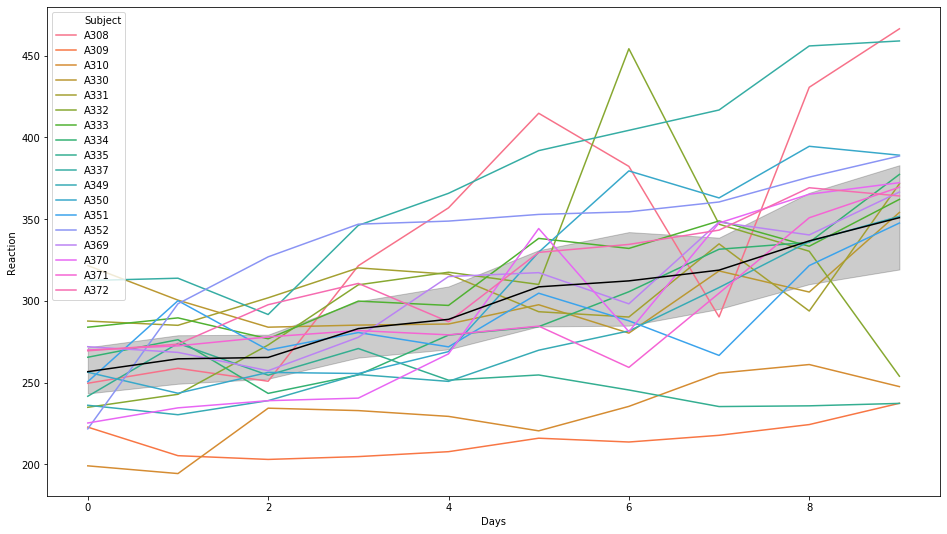

In [9]:
plt.figure(figsize=(16, 9))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', estimator = 'mean')